# Introduction
In this project, you will use the Fashion-MNIST dataset using a CNN neural network architecture.

In [ ]:
# needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from keras.layers import Dense, Activation


# Data Collection

In [ ]:
!unzip /content/fashion-mnist_train.csv.zip

Archive:  /content/fashion-mnist_train.csv.zip
  inflating: fashion-mnist_train.csv  


In [ ]:
!unzip /content/fashion-mnist_test.csv.zip

Archive:  /content/fashion-mnist_test.csv.zip
  inflating: fashion-mnist_test.csv  


In [67]:
train_df = pd.read_csv('/content/fashion-mnist_train.csv')

In [68]:
test_df = pd.read_csv('/content/fashion-mnist_test.csv')

In [ ]:
print(train_df.shape)
print(test_df.shape)

(60000, 785)
(10000, 785)


In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


# Data Cleaning

In [ ]:
# get the columns with missing values
columns_with_missing_values = train_df.columns[train_df.isnull().any()]

# print the columns with missing values
print(columns_with_missing_values)


Index([], dtype='object')


Fortunately, there is no missing values.

In [ ]:
# count duplicates
duplicate_counts = train_df.duplicated().sum()

print("Number of duplicates:", duplicate_counts)

# get duplicate rows
duplicate_rows = train_df[train_df.duplicated(keep=False)]

print("Duplicate rows:", duplicate_rows)

Number of duplicates: 43
Duplicate rows:        label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
601        7       0       0       0       0       0       0       0       0   
831        1       0       0       0       0       0       0       0       0   
1826       1       0       0       0       0       0       0       0       0   
2024       6       0       0       0       0       0       0       0       0   
4974       3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
56657      6       0       0       0       0       0       0      33     110   
56840      2       0       0       0       0       0       0       0       1   
57107      6       0       0       0       0       0       0       0       0   
57724      4       0       0       0       0       0       0       0       0   
59607      6       0       0       0       0       0       0       1       0   

In [ ]:
# count duplicates
duplicate_counts_test = test_df.duplicated().sum()

print("Number of duplicates:", duplicate_counts_test)

# get duplicate rows
duplicate_rows_for_test = test_df[test_df.duplicated(keep=False)]

print("Duplicate rows:", duplicate_rows_for_test)

Number of duplicates: 1
Duplicate rows:       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
6334      0       0       0       0       0       0       0       0       0   
8569      0       0       0       0       0       0       0       0       0   

      pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
6334      51  ...        70        43        21         0         0         0   
8569      51  ...        70        43        21         0         0         0   

      pixel781  pixel782  pixel783  pixel784  
6334         0         0         0         0  
8569         0         0         0         0  

[2 rows x 785 columns]


In [69]:
# drop duplicated rows but keep last

train_df = train_df.drop_duplicates(keep='last')
test_df = test_df.drop_duplicates(keep='last')


# Visualize Data

In [ ]:
# convert the dataframes into numpy arrays of float32 type which is the acceptable form for tensorflow
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

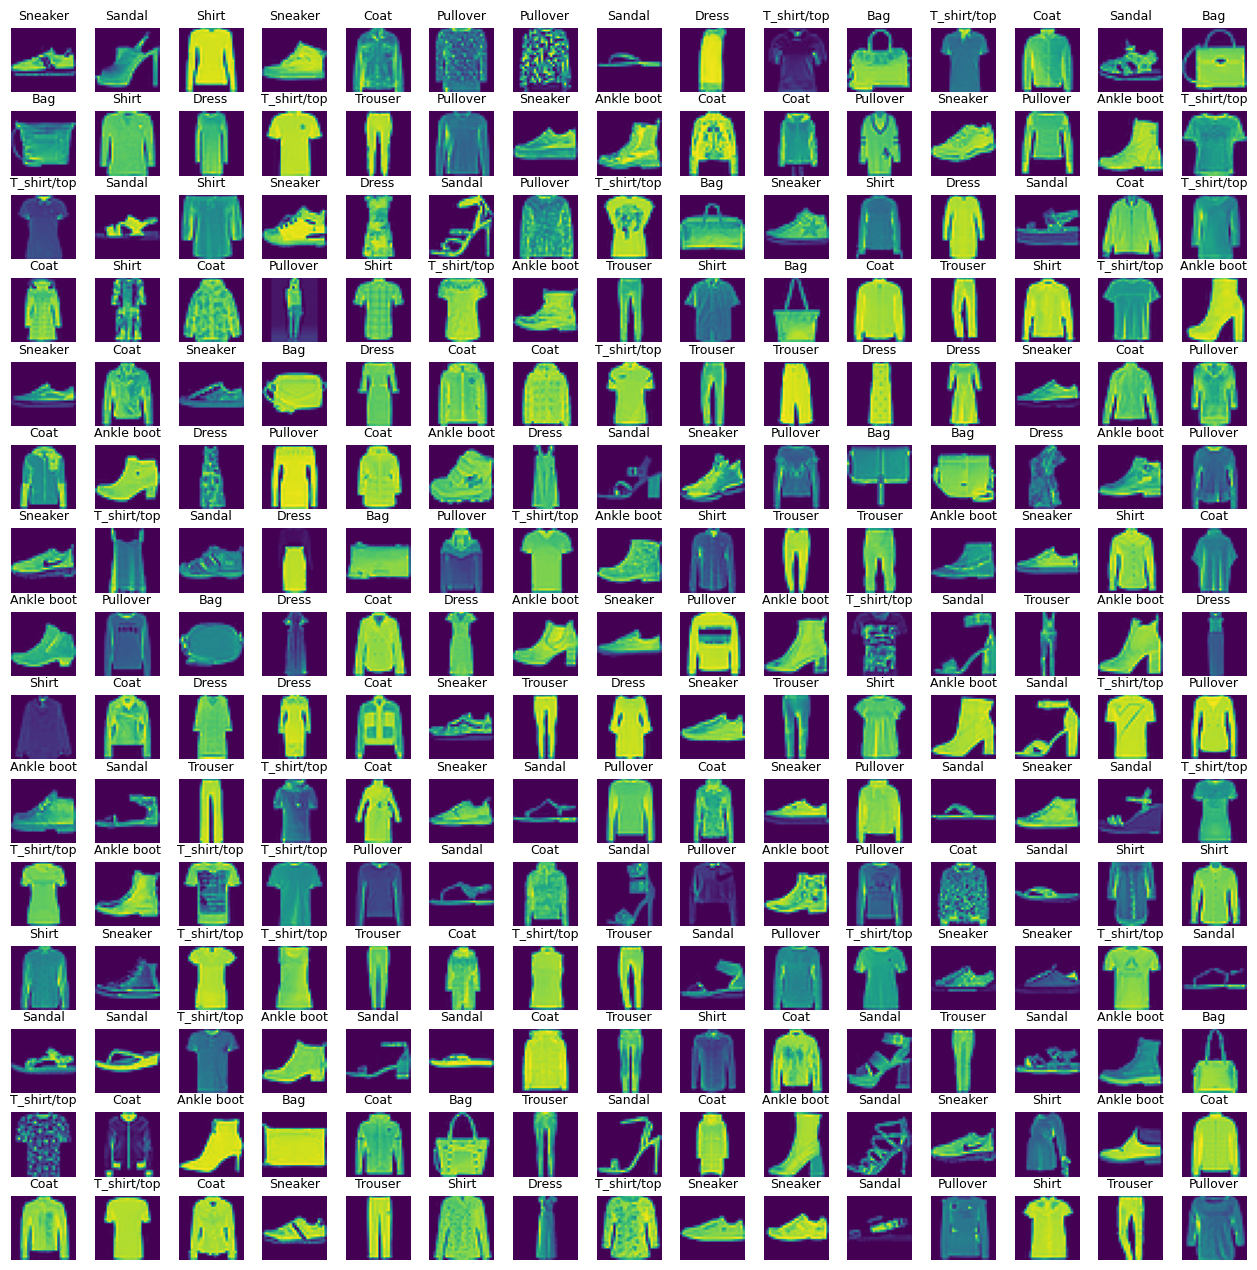

In [ ]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten
n_train = len(train_data) # get the length of the train dataset

# select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow( train_data[index,1:].reshape((28,28)) )
    labelindex = int(train_data[index,0])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [70]:
print(train_df['label'].unique())
print(test_df['label'].unique())

[2 9 6 0 3 4 5 8 7 1]
[0 1 2 3 8 6 5 4 7 9]


labels are encoded

**Labels**

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot


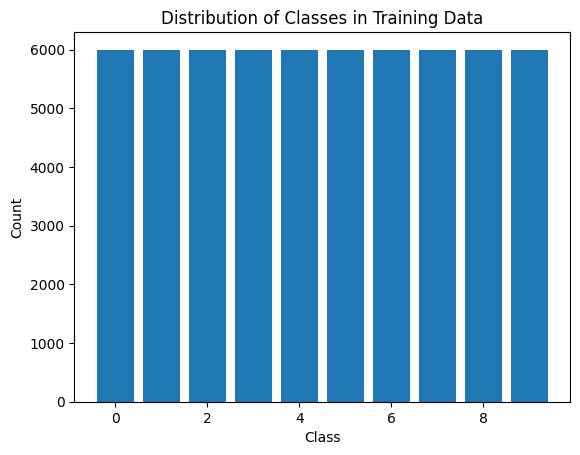

In [72]:
#  plot distribution of classes


labels = train_df['label'].value_counts().index.to_numpy()
counts = train_df['label'].value_counts().to_numpy()

# Create a bar chart
plt.bar(labels, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()


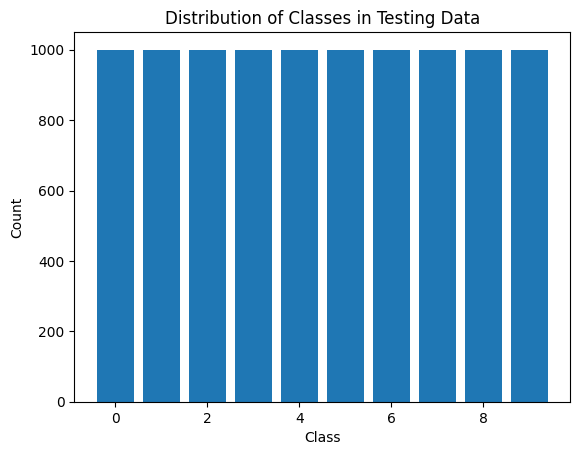

In [73]:
# plot distribution of classes

labels = test_df['label'].value_counts().index.to_numpy()
counts = test_df['label'].value_counts().to_numpy()

# Create a bar chart
plt.bar(labels, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in Testing Data')
plt.show()


## Fearures Correlation

In [ ]:
# calculate the correlation matrix of the train data

correlation_matrix = train_df.corr()

In [ ]:
most_correlated_features = correlation_matrix['label'].sort_values(ascending=False)[1:]


In [ ]:
most_correlated_features

pixel418    0.664796
pixel446    0.664342
pixel390    0.659438
pixel474    0.656927
pixel445    0.645520
              ...   
pixel67    -0.629224
pixel95    -0.629578
pixel41    -0.635065
pixel39    -0.646996
pixel40    -0.674527
Name: label, Length: 784, dtype: float64

## PCA

In [ ]:
train_features_pca = train_data[:,1:] / 255.0
train_labels_pca = train_data[:,0]

In [ ]:
train_features_pca.reshape(len(train_features_pca), -1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# perform PCA
pca = PCA(n_components=2)  # We reduce to 2 dimensions
principalComponents = pca.fit_transform(train_features_pca)

# Convert to DataFrame
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf['label'] = train_labels_pca  # add labels to the DataFrame

In [ ]:
principalDf.head()

,principal component 1,principal component 2,label
0,3.686081,4.960556,2.0
1,-4.376601,3.859452,9.0
2,7.265300,1.569914,6.0
3,3.228977,-2.325053,0.0
4,4.148112,-4.039209,3.0


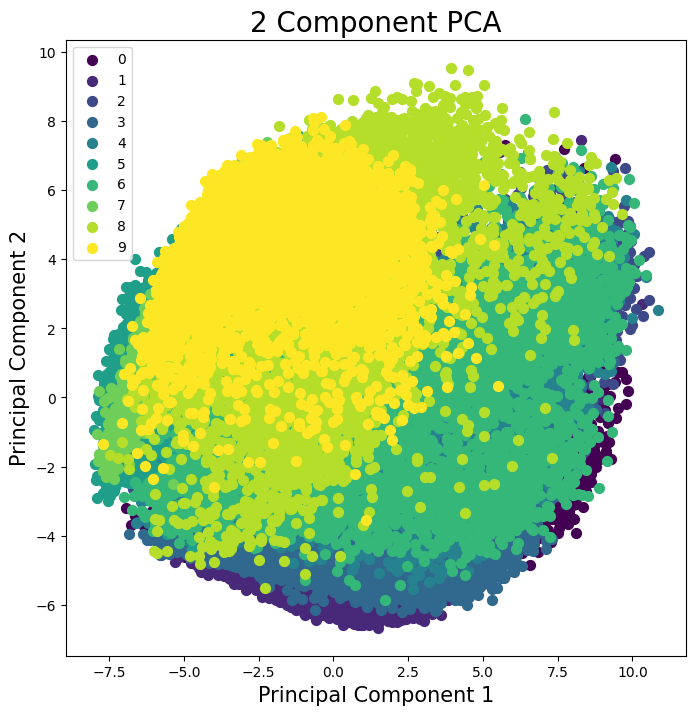

In [ ]:
# Visualize 2D Projection
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

# Create a color map
cmap = plt.get_cmap('viridis', 10)  # We have 10 classes in Fashion MNIST

# Plot each class in a different color
for i in range(10):
    subset = principalDf[principalDf['label'] == i]
    ax.scatter(subset['principal component 1'], subset['principal component 2'], s = 50, c = [cmap(i)], label = i)

ax.legend()
plt.show()

# Training neural networks



## LeNet-5

We will use LeNet architecture which consists of 2 parts:

- The first part includes two convolutional layers and two pooling layers which are placed alternatively.

- The second part consists of three fully connected layers.

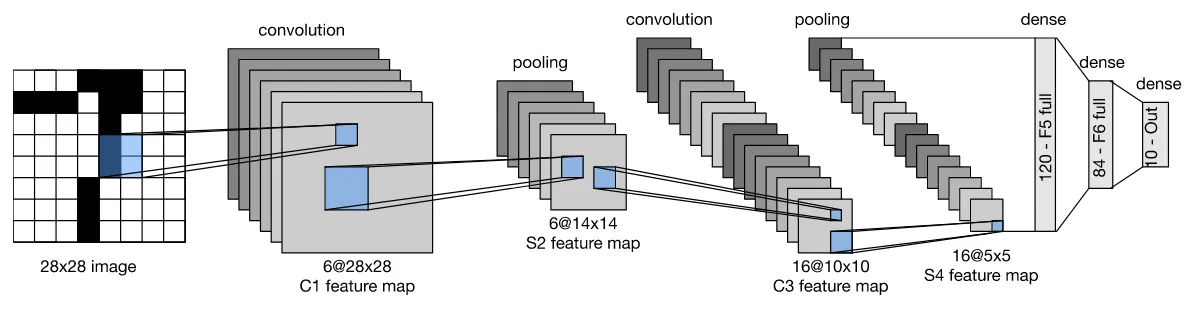

we will use some different hyperparameter as follows

batch_sizes = [32, 64, 128]

optimizers = ['SGD', 'Adam', 'RMSprop']

l2 kernel regularizer = [0.001, 0.01, 0.1]

In [ ]:
# reshape the data and normalize
X_train = train_data[:,1:].reshape(-1, 28, 28, 1) / 255.0
# select target
y_train = train_data[:,0]
# reshape the data and normalize
X_test = test_data[:,1:].reshape(-1, 28, 28, 1) / 255.0
# select target
y_test = test_data[:,0]

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
def lenet5_model(l2_reg=0.001):
    # construct the lenet5 model
    model = models.Sequential()
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l2(l2_reg)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(layers.Dense(84, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(layers.Dense(10, activation='softmax'))

    return model



In [ ]:
print(X_train.shape)
print(y_train.shape)

(59957, 28, 28, 1)
(59957, 10)


In [ ]:
epoch_num = 10

def train_lent5(optimizer='Adam', batch_size=128, l2_reg=0.001):

  kfold = KFold(n_splits=5, shuffle=True)
  fold = 0
  history_per_fold = []  # to store the history for each fold

  for train, val in kfold.split(X_train, y_train):
      fold += 1
      model = lenet5_model(l2_reg)
      model.compile(loss='categorical_crossentropy',
                optimizer=optimizer, metrics=['accuracy'])
      history = model.fit(X_train[train], y_train[train], validation_data=(X_train[val], y_train[val]), epochs=epoch_num, batch_size=batch_size, verbose=2)
      #scores = model.evaluate(X_train[val], y_train[val], verbose=1)
      #print(f'Score for fold {fold}: {scores[1] * 100}%')
      history_per_fold.append(history)

  return history_per_fold

In [ ]:
def plot_accuracy_over_hyperparams(*args):

  fig, ax = plt.subplots(1, 3, figsize=(18, 6))

  average_accuracy = [np.mean([history.history['accuracy'][epoch] for history in args[0]]) for epoch in range(epoch_num)]
  average_val_accuracy = [np.mean([history.history['val_accuracy'][epoch] for history in args[0]]) for epoch in range(epoch_num)]

  ax[0].plot(range(1, len(average_accuracy) + 1), average_accuracy, label='Average Accuracy', color='orange')
  ax[0].plot(range(1, len(average_val_accuracy) + 1), average_val_accuracy, label='Average Val Accuracy', linestyle='--', color='orange')
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Accuracy')
  ax[0].legend()

  average_accuracy = [np.mean([history.history['accuracy'][epoch] for history in args[1]]) for epoch in range(epoch_num)]
  average_val_accuracy = [np.mean([history.history['val_accuracy'][epoch] for history in args[1]]) for epoch in range(epoch_num)]

  ax[1].plot(range(1, len(average_accuracy) + 1), average_accuracy, label='Average Accuracy', color='green')
  ax[1].plot(range(1, len(average_val_accuracy) + 1), average_val_accuracy, label='Average Val Accuracy', linestyle='--', color='green')
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Accuracy')
  ax[1].legend()

  average_accuracy = [np.mean([history.history['accuracy'][epoch] for history in args[2]]) for epoch in range(epoch_num)]
  average_val_accuracy = [np.mean([history.history['val_accuracy'][epoch] for history in args[2]]) for epoch in range(epoch_num)]

  ax[2].plot(range(1, len(average_accuracy) + 1), average_accuracy, label='Average Accuracy', color='blue')
  ax[2].plot(range(1, len(average_val_accuracy) + 1), average_val_accuracy, label='Average Val Accuracy', linestyle='--', color='blue')
  ax[2].set_xlabel('Epoch')
  ax[2].set_ylabel('Accuracy')
  ax[2].legend()

  plt.suptitle(args[3])
  plt.tight_layout()
  plt.show()


In [ ]:
def plot_loss_over_hyperparams(*args):

  fig, ax = plt.subplots(1, 3, figsize=(18, 6))

  average_loss = [np.mean([history.history['loss'][epoch] for history in args[0]]) for epoch in range(epoch_num)]
  average_val_loss = [np.mean([history.history['val_loss'][epoch] for history in args[0]]) for epoch in range(epoch_num)]

  ax[0].plot(range(1, len(average_loss) + 1), average_loss, label='Average Loss', color='orange')
  ax[0].plot(range(1, len(average_val_loss) + 1), average_val_loss, label='Average Val Loss', linestyle='--', color='orange')
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Loss')
  ax[0].legend()

  average_loss = [np.mean([history.history['loss'][epoch] for history in args[1]]) for epoch in range(epoch_num)]
  average_val_loss = [np.mean([history.history['val_loss'][epoch] for history in args[1]]) for epoch in range(epoch_num)]

  ax[1].plot(range(1, len(average_loss) + 1), average_loss, label='Average Loss', color='green')
  ax[1].plot(range(1, len(average_val_loss) + 1), average_val_loss, label='Average Val Loss', linestyle='--', color='green')
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Loss')
  ax[1].legend()

  average_loss = [np.mean([history.history['loss'][epoch] for history in args[2]]) for epoch in range(epoch_num)]
  average_val_loss = [np.mean([history.history['val_loss'][epoch] for history in args[2]]) for epoch in range(epoch_num)]

  ax[2].plot(range(1, len(average_loss) + 1), average_loss, label='Average Loss', color='blue')
  ax[2].plot(range(1, len(average_val_loss) + 1), average_val_loss, label='Average Val Loss', linestyle='--', color='blue')
  ax[2].set_xlabel('Epoch')
  ax[2].set_ylabel('Loss')
  ax[2].legend()

  plt.suptitle(args[3])
  plt.tight_layout()
  plt.show()


In [ ]:
train_model_batch_size_32 = train_lent5(batch_size=32)
train_model_batch_size_64 = train_lent5(batch_size=64)
train_model_batch_size_128 = train_lent5(batch_size=128)

Epoch 1/10
1499/1499 - 12s - loss: 0.7739 - accuracy: 0.7703 - val_loss: 0.6075 - val_accuracy: 0.8313 - 12s/epoch - 8ms/step
Epoch 2/10
1499/1499 - 7s - loss: 0.5466 - accuracy: 0.8486 - val_loss: 0.5247 - val_accuracy: 0.8505 - 7s/epoch - 4ms/step
Epoch 3/10
1499/1499 - 7s - loss: 0.4811 - accuracy: 0.8649 - val_loss: 0.4798 - val_accuracy: 0.8639 - 7s/epoch - 5ms/step
Epoch 4/10
1499/1499 - 6s - loss: 0.4451 - accuracy: 0.8742 - val_loss: 0.4570 - val_accuracy: 0.8644 - 6s/epoch - 4ms/step
Epoch 5/10
1499/1499 - 7s - loss: 0.4262 - accuracy: 0.8777 - val_loss: 0.4398 - val_accuracy: 0.8739 - 7s/epoch - 5ms/step
Epoch 6/10
1499/1499 - 6s - loss: 0.4085 - accuracy: 0.8849 - val_loss: 0.4201 - val_accuracy: 0.8812 - 6s/epoch - 4ms/step
Epoch 7/10
1499/1499 - 7s - loss: 0.3950 - accuracy: 0.8880 - val_loss: 0.4008 - val_accuracy: 0.8863 - 7s/epoch - 5ms/step
Epoch 8/10
1499/1499 - 7s - loss: 0.3838 - accuracy: 0.8914 - val_loss: 0.4069 - val_accuracy: 0.8847 - 7s/epoch - 4ms/step
Epoch 

In [ ]:
train_model_opt_sgd = train_lent5(optimizer='SGD')
train_model_opt_adam = train_lent5(optimizer='Adam')
train_model_opt_rmsprop = train_lent5(optimizer='RMSprop')

Epoch 1/10
375/375 - 3s - loss: 1.8952 - accuracy: 0.4331 - val_loss: 1.1673 - val_accuracy: 0.6550 - 3s/epoch - 8ms/step
Epoch 2/10
375/375 - 2s - loss: 1.0813 - accuracy: 0.6962 - val_loss: 1.0341 - val_accuracy: 0.7118 - 2s/epoch - 4ms/step
Epoch 3/10
375/375 - 2s - loss: 0.9775 - accuracy: 0.7326 - val_loss: 0.9497 - val_accuracy: 0.7381 - 2s/epoch - 6ms/step
Epoch 4/10
375/375 - 2s - loss: 0.9136 - accuracy: 0.7576 - val_loss: 0.8870 - val_accuracy: 0.7716 - 2s/epoch - 5ms/step
Epoch 5/10
375/375 - 2s - loss: 0.8718 - accuracy: 0.7737 - val_loss: 0.8503 - val_accuracy: 0.7796 - 2s/epoch - 4ms/step
Epoch 6/10
375/375 - 2s - loss: 0.8363 - accuracy: 0.7873 - val_loss: 0.8081 - val_accuracy: 0.7985 - 2s/epoch - 4ms/step
Epoch 7/10
375/375 - 2s - loss: 0.8097 - accuracy: 0.7977 - val_loss: 0.7801 - val_accuracy: 0.8141 - 2s/epoch - 4ms/step
Epoch 8/10
375/375 - 2s - loss: 0.7846 - accuracy: 0.8077 - val_loss: 0.7928 - val_accuracy: 0.8072 - 2s/epoch - 4ms/step
Epoch 9/10
375/375 - 2s 

In [ ]:
train_model_l2_reg_001 = train_lent5(l2_reg=0.001)
train_model_l2_reg_01 = train_lent5(l2_reg=0.01)
train_model_l2_reg_1 = train_lent5(l2_reg=0.1)

Epoch 1/10
375/375 - 4s - loss: 0.9420 - accuracy: 0.7192 - val_loss: 0.7001 - val_accuracy: 0.8020 - 4s/epoch - 10ms/step
Epoch 2/10
375/375 - 2s - loss: 0.6405 - accuracy: 0.8199 - val_loss: 0.6141 - val_accuracy: 0.8319 - 2s/epoch - 6ms/step
Epoch 3/10
375/375 - 2s - loss: 0.5669 - accuracy: 0.8447 - val_loss: 0.5226 - val_accuracy: 0.8633 - 2s/epoch - 4ms/step
Epoch 4/10
375/375 - 2s - loss: 0.5223 - accuracy: 0.8577 - val_loss: 0.5105 - val_accuracy: 0.8613 - 2s/epoch - 4ms/step
Epoch 5/10
375/375 - 2s - loss: 0.4892 - accuracy: 0.8654 - val_loss: 0.4802 - val_accuracy: 0.8672 - 2s/epoch - 5ms/step
Epoch 6/10
375/375 - 2s - loss: 0.4677 - accuracy: 0.8698 - val_loss: 0.4610 - val_accuracy: 0.8735 - 2s/epoch - 5ms/step
Epoch 7/10
375/375 - 2s - loss: 0.4465 - accuracy: 0.8733 - val_loss: 0.4454 - val_accuracy: 0.8750 - 2s/epoch - 5ms/step
Epoch 8/10
375/375 - 2s - loss: 0.4348 - accuracy: 0.8785 - val_loss: 0.4302 - val_accuracy: 0.8769 - 2s/epoch - 6ms/step
Epoch 9/10
375/375 - 2s

### Plotting results of Lent-5

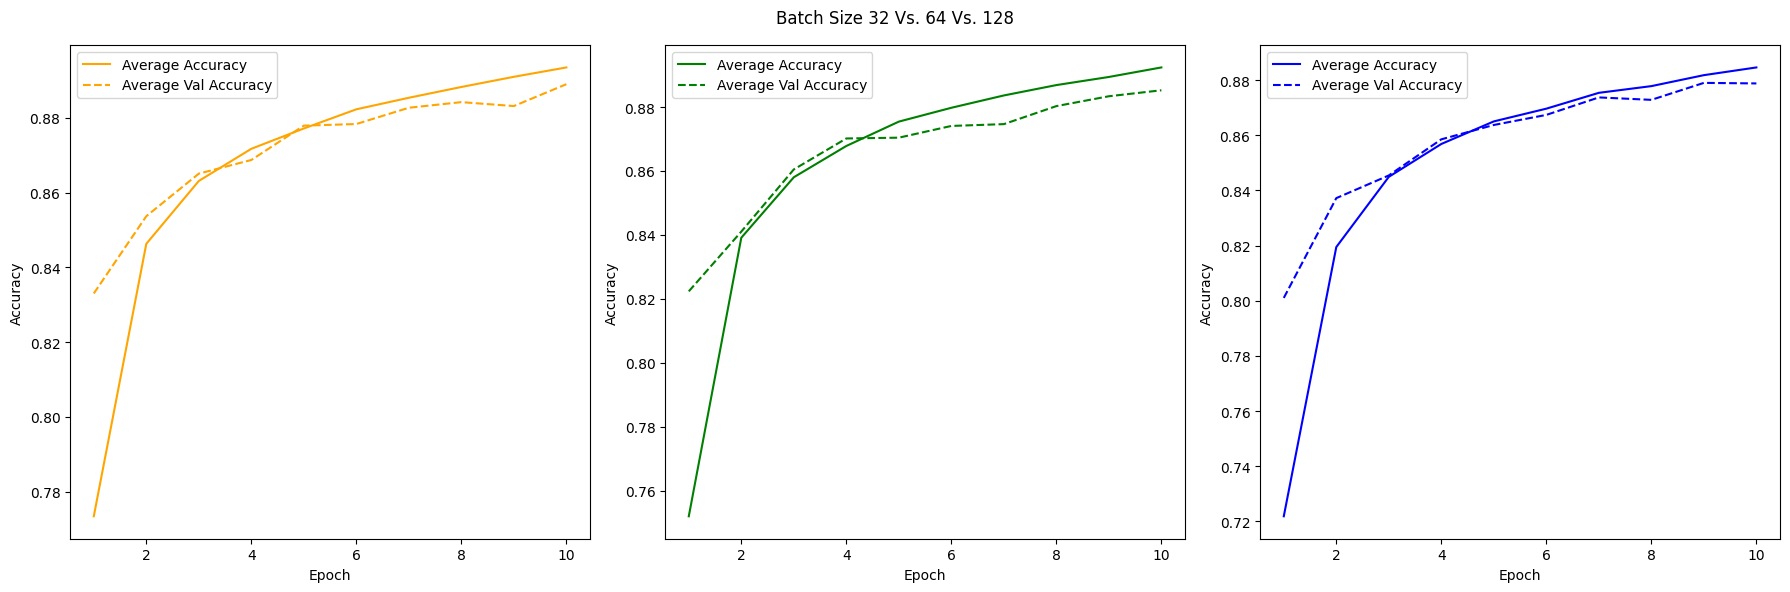

In [ ]:
plot_accuracy_over_hyperparams(train_model_batch_size_32, train_model_batch_size_64,
                               train_model_batch_size_128, 'Batch Size 32 Vs. 64 Vs. 128')

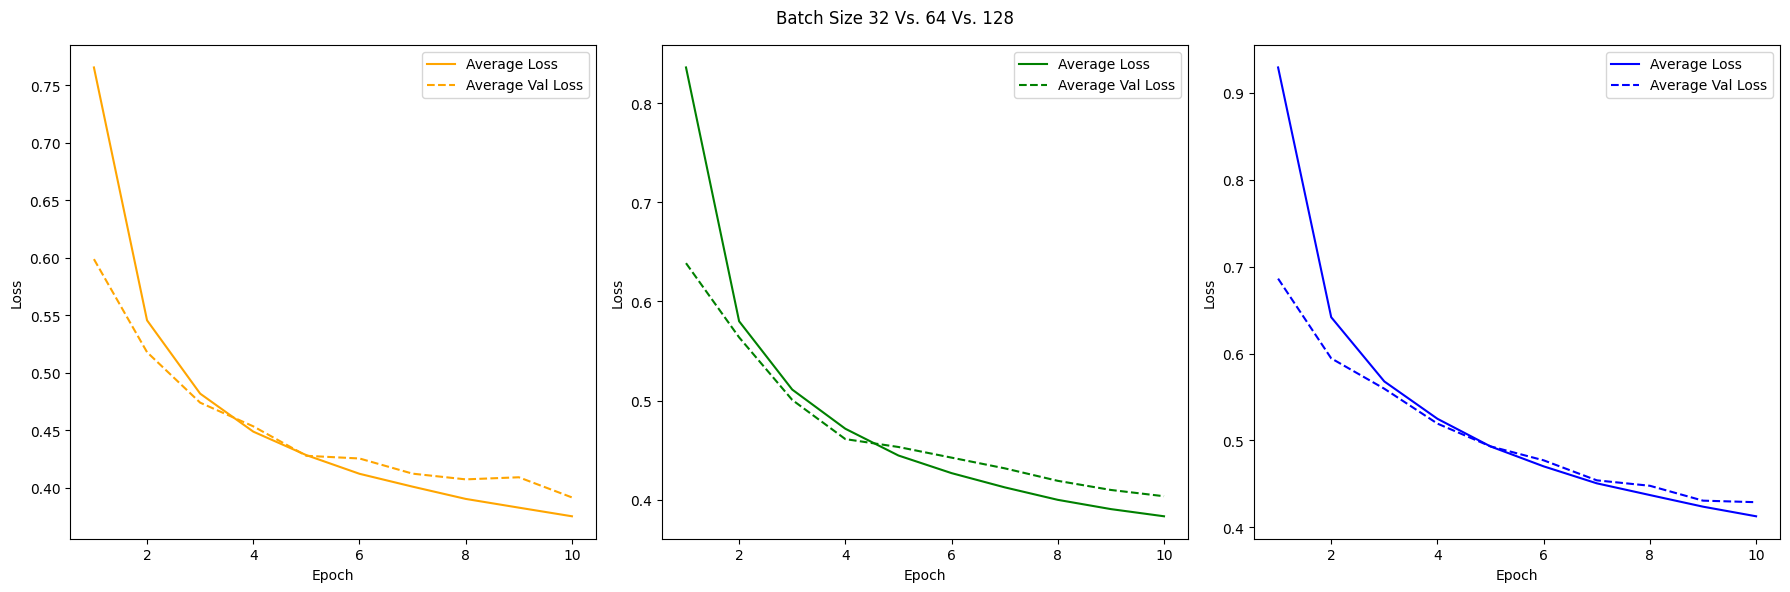

In [ ]:
plot_loss_over_hyperparams(train_model_batch_size_32, train_model_batch_size_64,
                               train_model_batch_size_128, 'Batch Size 32 Vs. 64 Vs. 128')

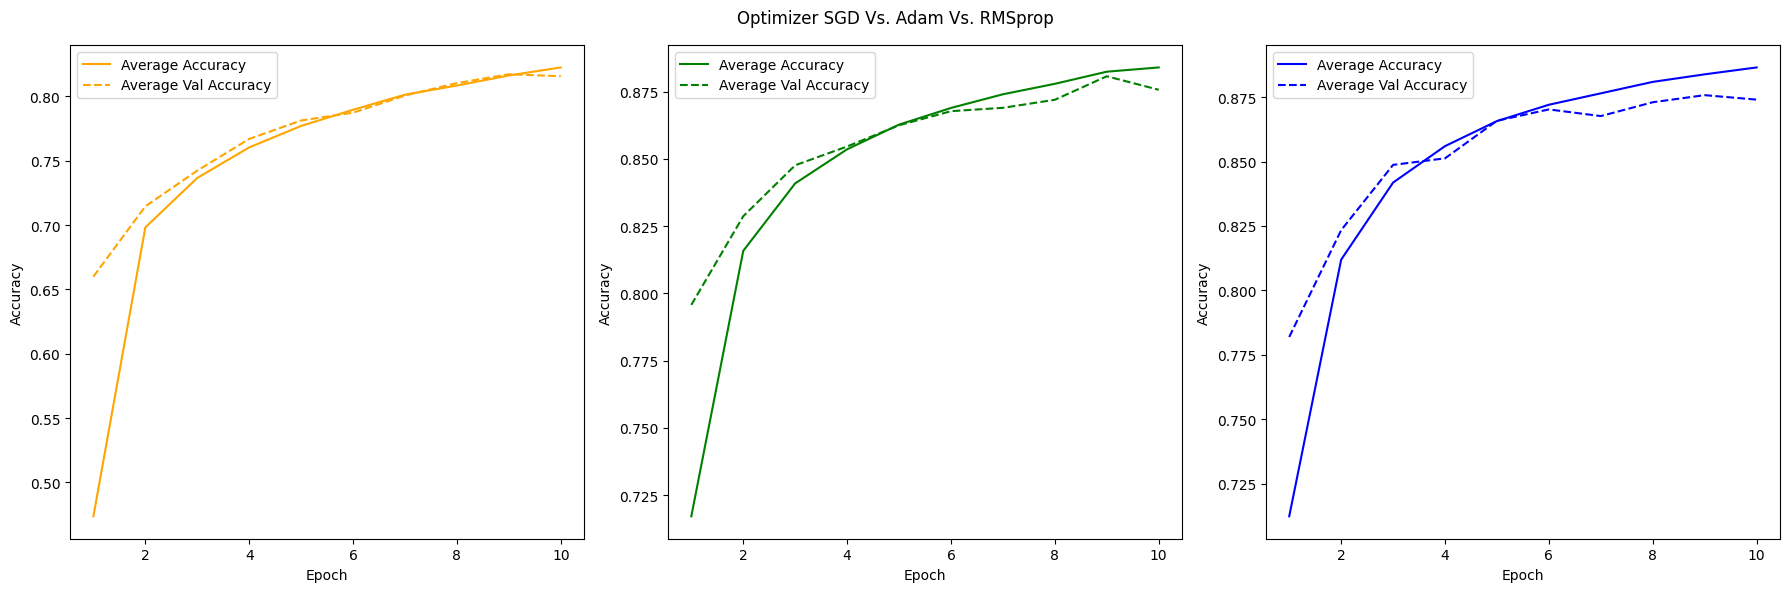

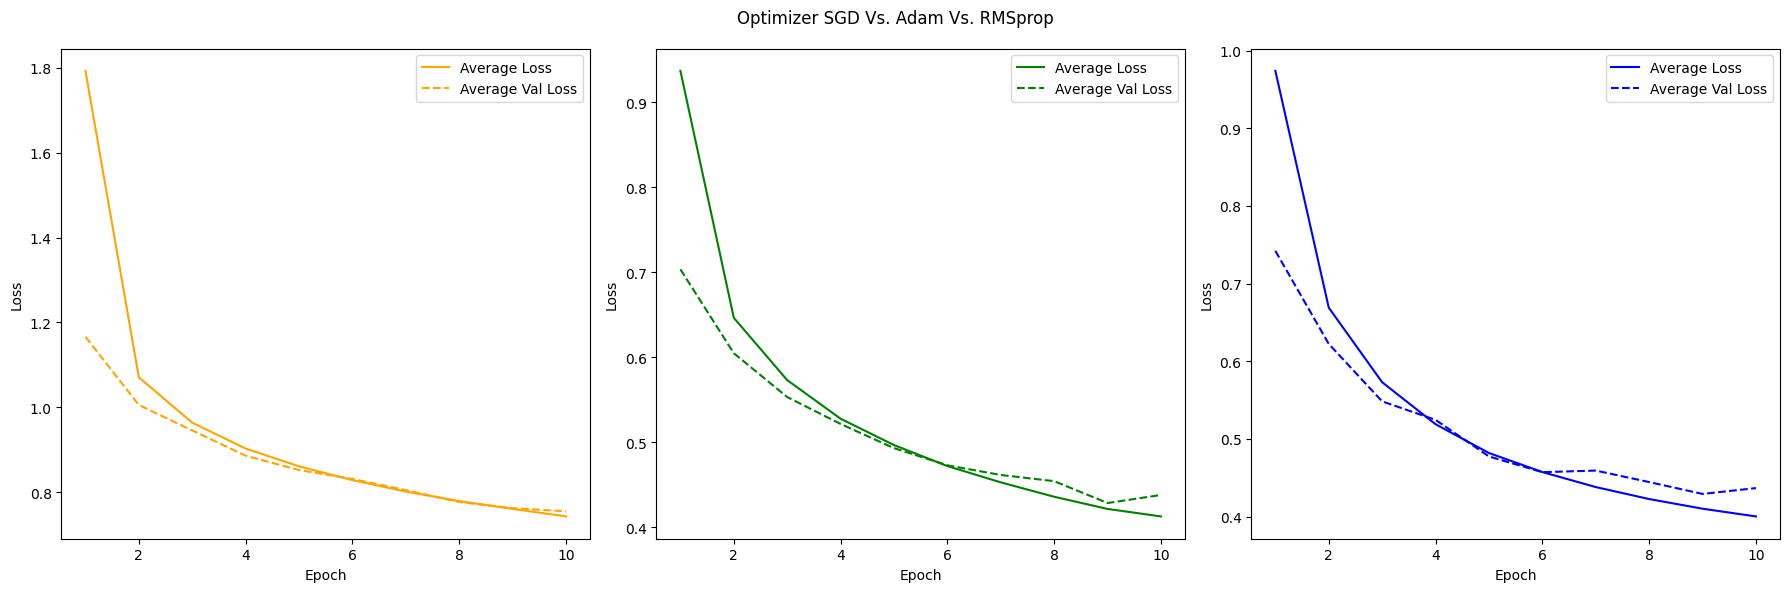

In [ ]:
plot_accuracy_over_hyperparams(train_model_opt_sgd, train_model_opt_adam,
                               train_model_opt_rmsprop, 'Optimizer SGD Vs. Adam Vs. RMSprop')

plot_loss_over_hyperparams(train_model_opt_sgd, train_model_opt_adam,
                               train_model_opt_rmsprop, 'Optimizer SGD Vs. Adam Vs. RMSprop')

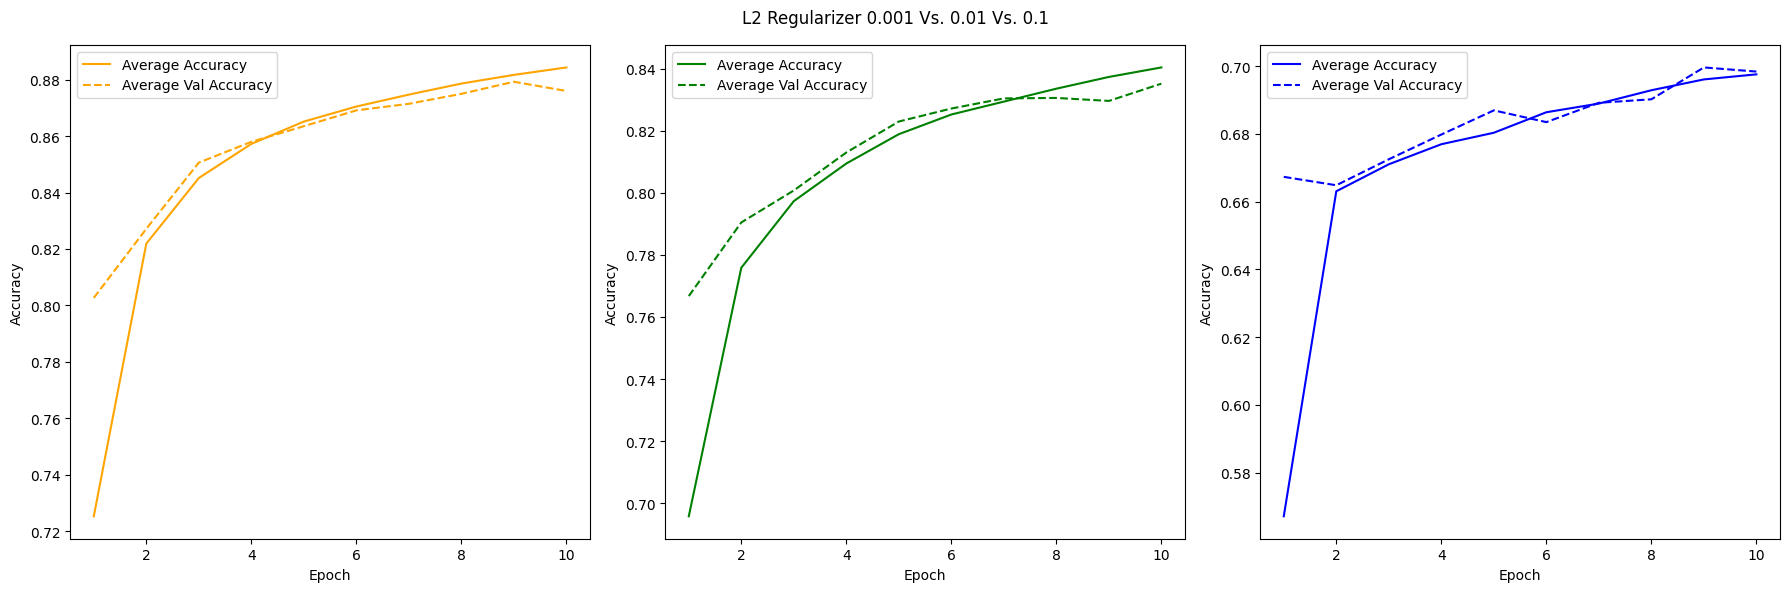

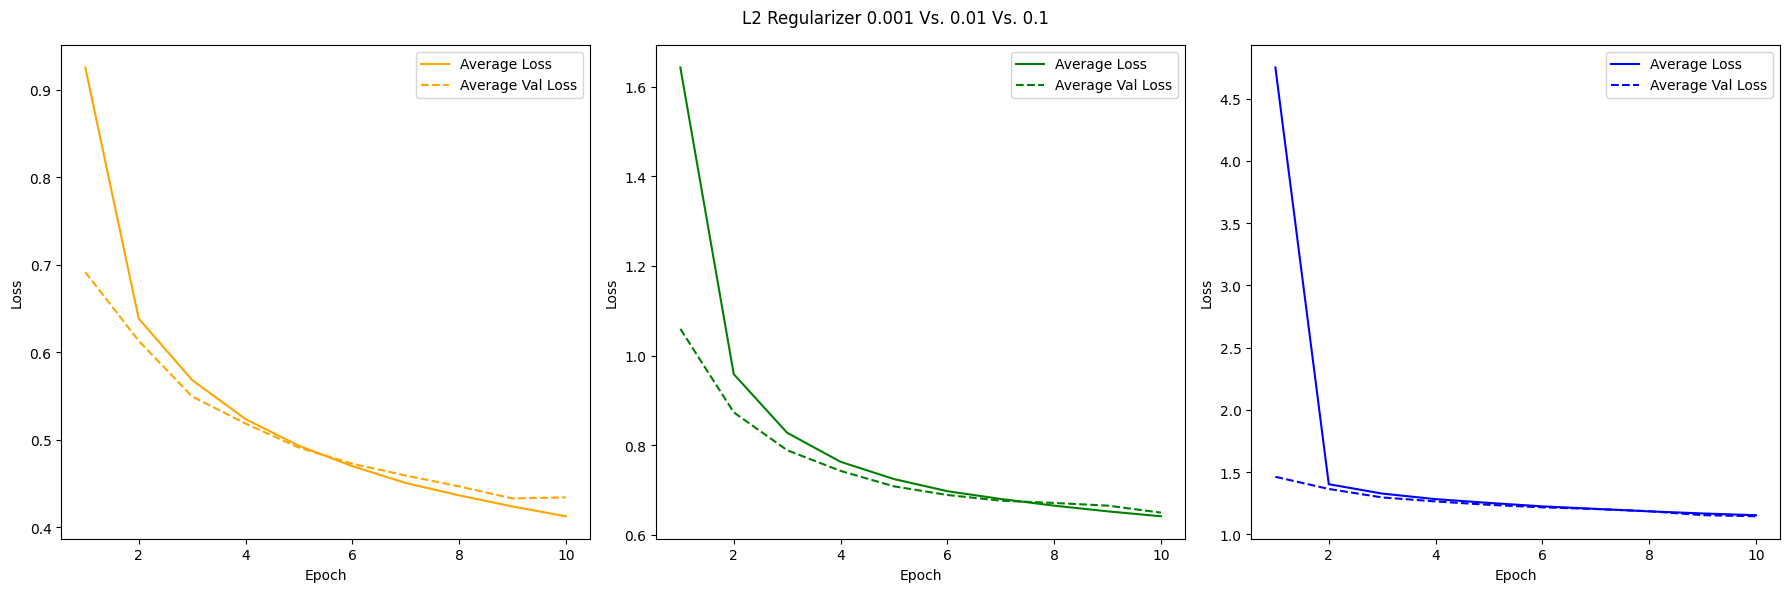

In [ ]:
plot_accuracy_over_hyperparams(train_model_l2_reg_001, train_model_l2_reg_01,
                               train_model_l2_reg_1, "L2 Regularizer 0.001 Vs. 0.01 Vs. 0.1")

plot_loss_over_hyperparams(train_model_l2_reg_001, train_model_l2_reg_01,
                               train_model_l2_reg_1, "L2 Regularizer 0.001 Vs. 0.01 Vs. 0.1")

## MLP

In [ ]:
# reshape the data and normalize
X_train = train_data[:,1:]/ 255.0

# select target
y_train = train_data[:,0]

y_train = to_categorical(y_train)


In [ ]:
print(X_train.shape)

(59957, 784)


In [ ]:
model = Sequential()

model.add(Dense(512, input_dim = 784))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))


In [ ]:
kfold = KFold(n_splits=5, shuffle=True)
fold = 0
history_per_fold = []  # to store the history for each fold

for train, val in kfold.split(X_train, y_train):
    fold += 1
    model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(X_train[train], y_train[train], validation_data=(X_train[val], y_train[val]), epochs=10, batch_size=128, verbose=2)
    history_per_fold.append(history)



Epoch 1/10
375/375 - 9s - loss: 0.5077 - accuracy: 0.8170 - val_loss: 0.3968 - val_accuracy: 0.8547 - 9s/epoch - 24ms/step
Epoch 2/10
375/375 - 9s - loss: 0.3743 - accuracy: 0.8620 - val_loss: 0.3669 - val_accuracy: 0.8687 - 9s/epoch - 23ms/step
Epoch 3/10
375/375 - 8s - loss: 0.3336 - accuracy: 0.8760 - val_loss: 0.3551 - val_accuracy: 0.8650 - 8s/epoch - 22ms/step
Epoch 4/10
375/375 - 8s - loss: 0.3077 - accuracy: 0.8855 - val_loss: 0.3477 - val_accuracy: 0.8749 - 8s/epoch - 22ms/step
Epoch 5/10
375/375 - 9s - loss: 0.2862 - accuracy: 0.8936 - val_loss: 0.3177 - val_accuracy: 0.8849 - 9s/epoch - 23ms/step
Epoch 6/10
375/375 - 7s - loss: 0.2738 - accuracy: 0.8977 - val_loss: 0.3521 - val_accuracy: 0.8687 - 7s/epoch - 19ms/step
Epoch 7/10
375/375 - 9s - loss: 0.2581 - accuracy: 0.9030 - val_loss: 0.3242 - val_accuracy: 0.8872 - 9s/epoch - 23ms/step
Epoch 8/10
375/375 - 8s - loss: 0.2492 - accuracy: 0.9059 - val_loss: 0.3045 - val_accuracy: 0.8907 - 8s/epoch - 22ms/step
Epoch 9/10
375/3

### Plotting results of MLP

In [ ]:
for i in history_per_fold:
  print(i.history['val_accuracy'])

[0.8546531200408936, 0.8687458038330078, 0.8649933338165283, 0.8749166131019592, 0.8849232792854309, 0.8687458038330078, 0.8871747851371765, 0.8906770944595337, 0.8900933861732483, 0.8800033330917358]
[0.9225316643714905, 0.9092728495597839, 0.9089393019676208, 0.9100233316421509, 0.9048532247543335, 0.9089393019676208, 0.9111074209213257, 0.9054369330406189, 0.9165276885032654, 0.9140260219573975]
[0.9372863173484802, 0.9395380020141602, 0.9371194839477539, 0.9381202459335327, 0.93670254945755, 0.9353681802749634, 0.9306146502494812, 0.9310315847396851, 0.9247769117355347, 0.9301976561546326]
[0.9615545272827148, 0.9522141814231873, 0.9601367712020874, 0.9495455026626587, 0.9559669494628906, 0.9501292705535889, 0.9509631991386414, 0.945625901222229, 0.9515469670295715, 0.9523809552192688]
[0.9660578966140747, 0.9625552296638489, 0.9635559916496277, 0.9525477290153503, 0.9563005566596985, 0.9625552296638489, 0.9507964253425598, 0.9546326398849487, 0.9615545272827148, 0.9542156457901001

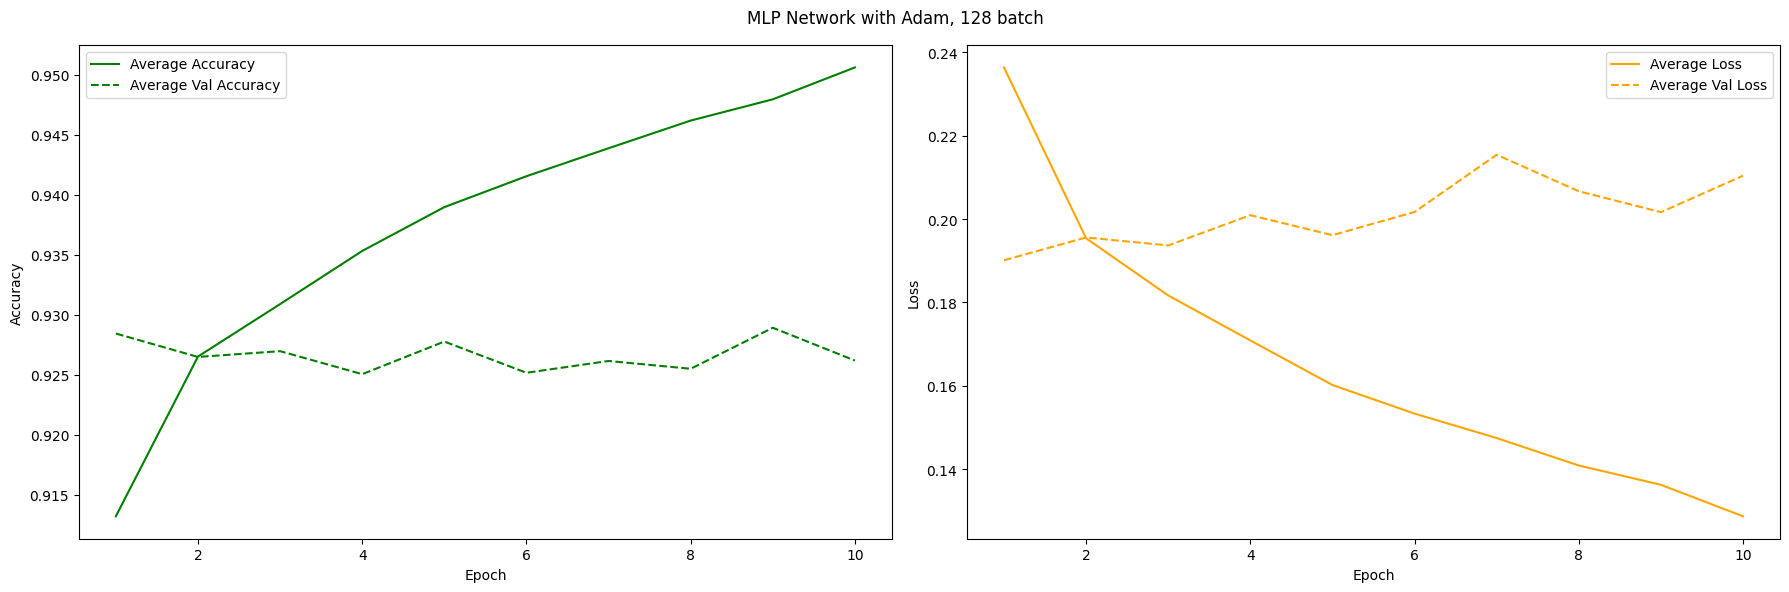

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

average_accuracy = [np.mean([history.history['accuracy'][epoch] for history in history_per_fold]) for epoch in range(10)]
average_val_accuracy = [np.mean([history.history['val_accuracy'][epoch] for history in history_per_fold]) for epoch in range(10)]

ax[0].plot(range(1, len(average_accuracy) + 1), average_accuracy, label='Average Accuracy', color='Green')
ax[0].plot(range(1, len(average_val_accuracy) + 1), average_val_accuracy, label='Average Val Accuracy', linestyle='--', color='Green')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()


average_loss = [np.mean([history.history['loss'][epoch] for history in history_per_fold]) for epoch in range(10)]
average_val_loss = [np.mean([history.history['val_loss'][epoch] for history in history_per_fold]) for epoch in range(10)]

ax[1].plot(range(1, len(average_loss) + 1), average_loss, label='Average Loss', color='orange')
ax[1].plot(range(1, len(average_val_loss) + 1), average_val_loss, label='Average Val Loss', linestyle='--', color='orange')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.suptitle("MLP Network with Adam, 128 batch")
plt.tight_layout()
plt.show()

Lenet-5 apparently excels the MLP as it has overfitting and can’t generalize well on the validation set.

## Transfer Learning

### VGG-16

In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from PIL import Image

# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Resize images to 32x32 pixels
X_train_resized = np.array([np.array(Image.fromarray(img).resize((32, 32))) for img in X_train])
X_test_resized = np.array([np.array(Image.fromarray(img).resize((32, 32))) for img in X_test])

# Convert grayscale images to RGB format
X_train_rgb = np.repeat(X_train_resized[..., np.newaxis], 3, axis=-1)
X_test_rgb = np.repeat(X_test_resized[..., np.newaxis], 3, axis=-1)

# Normalize pixel values to range [0, 1]
X_train_rgb = X_train_rgb.astype('float32') / 255.0
X_test_rgb = X_test_rgb.astype('float32') / 255.0

# One-hot encode the target labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Load pre-trained VGG model without top (fully connected) layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the convolutional layers
for layer in vgg_base.layers:
    layer.trainable = False

# Add new top layers for Fashion MNIST classification
model = Sequential()
model.add(vgg_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [ ]:
# Train the model
history = model.fit(X_train_rgb, y_train, epochs=10, batch_size=128, validation_data=(X_test_rgb, y_test), verbose=2)



In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_rgb, y_test)
print("Test Accuracy:", test_acc)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot training and validation accuracy over epochs
ax[0].plot(history.history['accuracy'], label='Training Accuracy', color='green')
ax[0].plot(history.history['val_accuracy'], label='Val Accuracy', linestyle='--', color='green')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()


ax[1].plot(history.history['loss'], label='Training Loss', color='orange')
ax[1].plot(history.history['val_loss'], label='Val Loss', linestyle='--', color='orange')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')

plt.suptitle('VGG Pre-trained Model')
plt.legend()
plt.show()

### ResNet50

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from PIL import Image


# Load pre-trained ResNet50 model without top (fully connected) layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the convolutional layers
for layer in resnet_base.layers:
    layer.trainable = False

# Add new top layers for Fashion MNIST classification
model = Sequential()
model.add(resnet_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])




In [ ]:
# Train the model
history_res = model.fit(X_train_rgb, y_train, epochs=10, batch_size=128, validation_data=(X_test_rgb, y_test))



In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_rgb, y_test)
print("Test Accuracy:", test_acc)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot training and validation accuracy over epochs
ax[0].plot(history_res.history['accuracy'], label='Training Accuracy', color='green')
ax[0].plot(history_res.history['val_accuracy'], label='Val Accuracy', linestyle='--', color='green')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()


ax[1].plot(history_res.history['loss'], label='Training Loss', color='orange')
ax[1].plot(history_res.history['val_loss'], label='Val Loss', linestyle='--', color='orange')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')

plt.suptitle('ResNet Pre-trained Model')
plt.legend()
plt.show()